In [1]:
# Gene: RNF168 ENSG00000163961
# Transcript ID	Name	bp	Protein	Biotype	CCDS	UniProt Match	RefSeq Match	Flags
# ENST00000318037.3	RNF168-201	5347	571aa	Protein coding
# ENST00000437070.1	RNF168-202	2202	116aa	Nonsense mediated decay

In [2]:
import pandas, numpy

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':16, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*2/3, 9*2/3), 
                            'axes.labelsize':16
                           })

# user-defined variables

In [4]:
control_input_file = '/Users/adrian/research/oskjuhlid/results/inference/inference_control/data.site_proba.csv'
fto_input_file = '/Users/adrian/research/oskjuhlid/results/inference/inference_fto/data.site_proba.csv'

# read information

In [5]:
df_control = pandas.read_csv(control_input_file, sep=',', index_col=0)
df_fto = pandas.read_csv(fto_input_file, sep=',', index_col=0)

print(df_control.shape)
print(df_fto.shape)

(501680, 5)
(793520, 5)


# comparison
each transcript, report as x the mean modification difference and y as the abs sum differential modifications
consider working with probability_modified instead mod_ratio because of quality scores? may need to check/follow up

In [6]:
%%time

all_transcripts = list(set(df_control.index) & set(df_fto.index))
all_transcripts.sort()
print(len(all_transcripts))

x = []; y = []; z = []

#for i in range(len(all_transcripts)):
for i in range(2000):
    transcript = all_transcripts[i]
    #print(transcript)

    ss_control = df_control.loc[transcript, ]
    ss_fto = df_fto.loc[transcript, ]

    if (isinstance(ss_control, pandas.DataFrame) == False) | (isinstance(ss_fto, pandas.DataFrame) == False): # ENST00000219345.10        
        print('\t dropping {} because of lack of data'.format(transcript))
    else:
        
        common_locations = list(set(ss_control['transcript_position']) & set(ss_fto['transcript_position']))
        
        common_locations.sort()
    
        cdf_control = ss_control[ss_control['transcript_position'].isin(common_locations)]
        cdf_fto = ss_fto[ss_fto['transcript_position'].isin(common_locations)]
    
        probs_control = cdf_control['probability_modified']
        probs_fto = cdf_fto['probability_modified']
        
        if numpy.max(probs_fto) > 1:
            raise ValueError('probability higher than one')
    
        methylation_differences = probs_fto.sub(probs_control)
    
        locations_found = methylation_differences.shape[0]
        sum_abs_differences = numpy.sum(numpy.abs(methylation_differences)) / locations_found
        #sum_abs_differences = numpy.sum(numpy.abs(methylation_differences))
        mean_differences = numpy.mean(methylation_differences)
        
        if locations_found > 10:
            x.append(mean_differences); y.append(sum_abs_differences); z.append(locations_found)

21912
	 dropping ENST00000219345.10 because of lack of data
	 dropping ENST00000223865.8 because of lack of data
	 dropping ENST00000227471.7 because of lack of data
	 dropping ENST00000227495.10 because of lack of data
	 dropping ENST00000230990.7 because of lack of data
	 dropping ENST00000232501.8 because of lack of data
	 dropping ENST00000233121.7 because of lack of data
	 dropping ENST00000234091.8 because of lack of data
	 dropping ENST00000239223.4 because of lack of data
	 dropping ENST00000242323.8 because of lack of data
	 dropping ENST00000243082.4 because of lack of data
	 dropping ENST00000249504.7 because of lack of data
	 dropping ENST00000251166.9 because of lack of data
	 dropping ENST00000252999.7 because of lack of data
	 dropping ENST00000253861.5 because of lack of data
	 dropping ENST00000256108.10 because of lack of data
	 dropping ENST00000256720.6 because of lack of data
	 dropping ENST00000258281.7 because of lack of data
	 dropping ENST00000259708.7 because 

<timed exec>:35: RuntimeWarning: invalid value encountered in scalar divide


	 dropping ENST00000263433.8 because of lack of data
	 dropping ENST00000265239.11 because of lack of data
	 dropping ENST00000265340.12 because of lack of data
	 dropping ENST00000265395.7 because of lack of data
	 dropping ENST00000268676.11 because of lack of data
	 dropping ENST00000269095.9 because of lack of data
	 dropping ENST00000275546.4 because of lack of data
	 dropping ENST00000276416.11 because of lack of data
	 dropping ENST00000277882.7 because of lack of data
	 dropping ENST00000278025.9 because of lack of data
	 dropping ENST00000281038.10 because of lack of data
	 dropping ENST00000281928.9 because of lack of data
	 dropping ENST00000283632.5 because of lack of data
	 dropping ENST00000288757.7 because of lack of data
	 dropping ENST00000289968.11 because of lack of data
CPU times: user 21.4 s, sys: 255 ms, total: 21.6 s
Wall time: 21.7 s


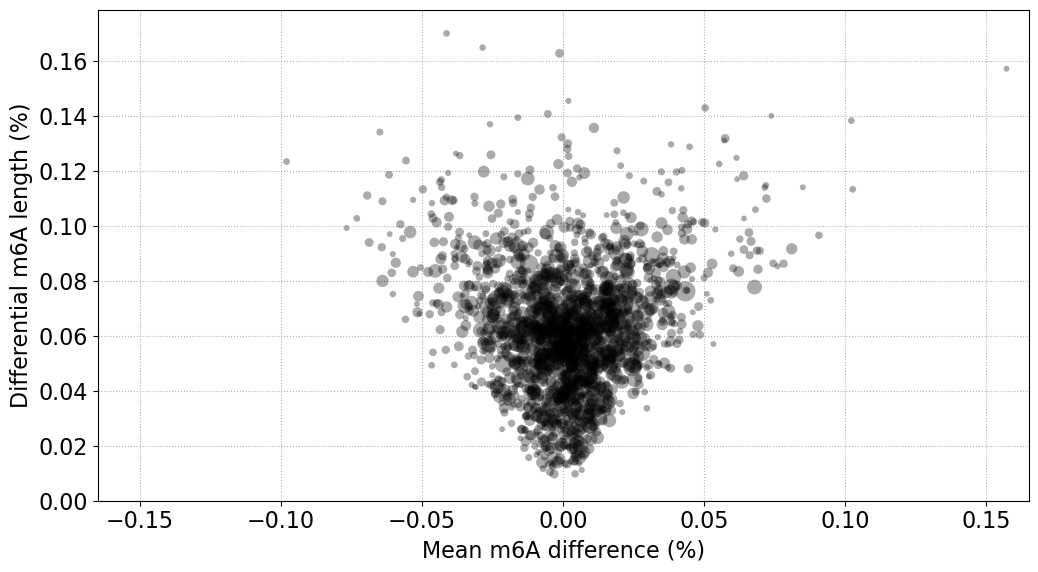

In [25]:
#matplotlib.pyplot.plot(x, y, 'o', color='black', alpha=1/3, mew=0)

sizes = numpy.array(z)**1.2
matplotlib.pyplot.scatter(x, y, s=sizes, color='black', alpha=1/3, edgecolors='none', zorder=2)

limit = numpy.max(numpy.abs(x))
border = limit + 0.05*limit
matplotlib.pyplot.xlim(-border, border)
top_length = numpy.max(y)
matplotlib.pyplot.ylim(0, top_length + 0.05*top_length)

matplotlib.pyplot.xlabel('Mean m6A difference (%)')
matplotlib.pyplot.ylabel('Differential m6A length (%)')

matplotlib.pyplot.grid(ls=':', zorder=0)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [8]:
# make the histogram of locations
